# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [2]:
#import some required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt=pd.read_csv(r'C:\Users\Shalini Maurya\Desktop\dataset/HR-Employee-Attrition.csv')

In [4]:
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EDA

In [5]:
dt.shape

(1470, 35)

There are 1470 rows and 35 columns are available 

In [6]:
#lets see some information about dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#lets check if any null values is there
dt.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing value available, so we can proceed

In [8]:
#lets drop the employee number as it is not useful
dt.drop(columns =['EmployeeNumber'],axis=1,inplace=True)

In [9]:
# Column Over18 has only 1 value and due to only 1, it will not helpful for the dataset, Let's drop it
dt.drop(columns = ["Over18"], axis=1, inplace=True)

In [10]:
# Employ count has only 1 value. So, it is not useful to the dataset let's drop it
dt.drop(columns = ["EmployeeCount"], axis=1, inplace=True)

In [11]:
# StandardHours has only 1 value. So, it is not useful to the dataset let's drop it
dt.drop(columns = ["StandardHours"], axis=1, inplace=True)

# Univariate analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

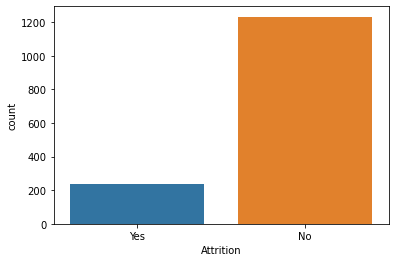

In [12]:
#Lets check the target column
sns.countplot(x='Attrition', data=dt)

#There is high  class imbalnce issue

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

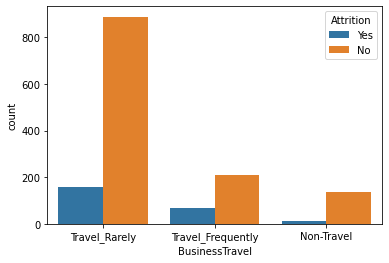

In [13]:
#business travel vs Attrition
sns.countplot(x='BusinessTravel',hue='Attrition',data=dt)

<AxesSubplot:xlabel='Department', ylabel='count'>

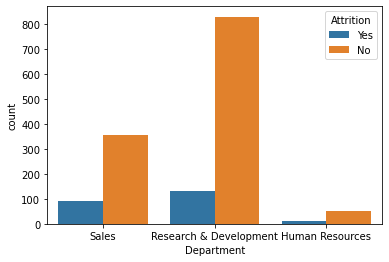

In [14]:
#Department vs Attrition
sns.countplot(x='Department',hue='Attrition',data=dt)

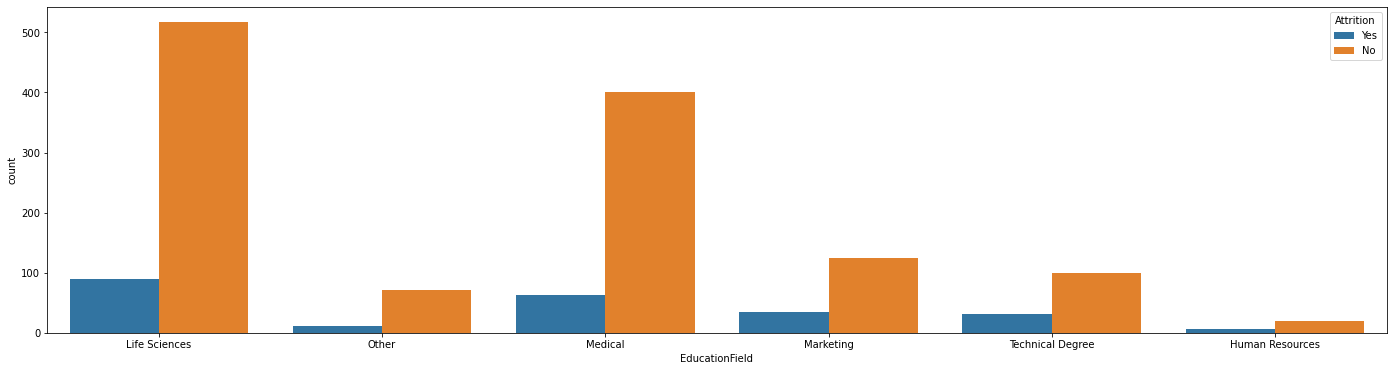

In [17]:
# Education vs Attrition

plt.figure(figsize=(24,6))
sns.countplot(x="EducationField", data=dt, hue="Attrition")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

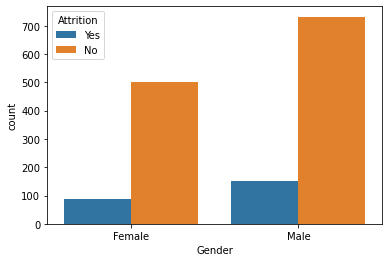

In [18]:
# Gender vs Attrition

sns.countplot(x="Gender", data=dt, hue="Attrition")

# Almost equal % contribution to yes attrition by male and female

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

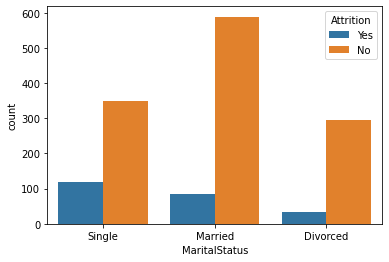

In [19]:
# Maritial Status vs Attrition

sns.countplot(x="MaritalStatus", data=dt, hue="Attrition")

# Single are giving high in % to the yes attrition

<AxesSubplot:xlabel='OverTime', ylabel='count'>

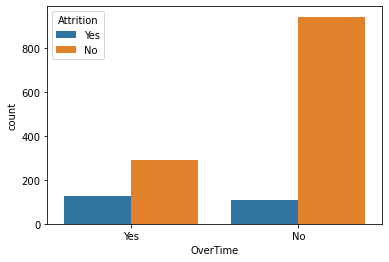

In [20]:
# OverTime vs Attrition

sns.countplot(x="OverTime", data=dt, hue="Attrition")

<AxesSubplot:xlabel='Age', ylabel='count'>

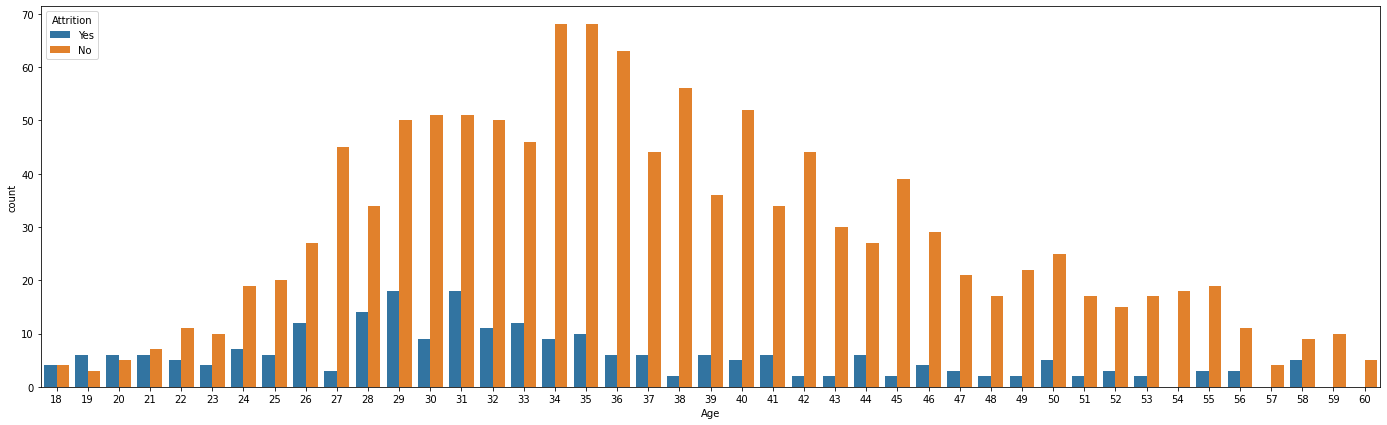

In [22]:
# Age vs Attrition

plt.figure(figsize=(24,7))
sns.countplot(x="Age", data=dt, hue="Attrition")

# employee less than age 31 age have higher attrition to yes

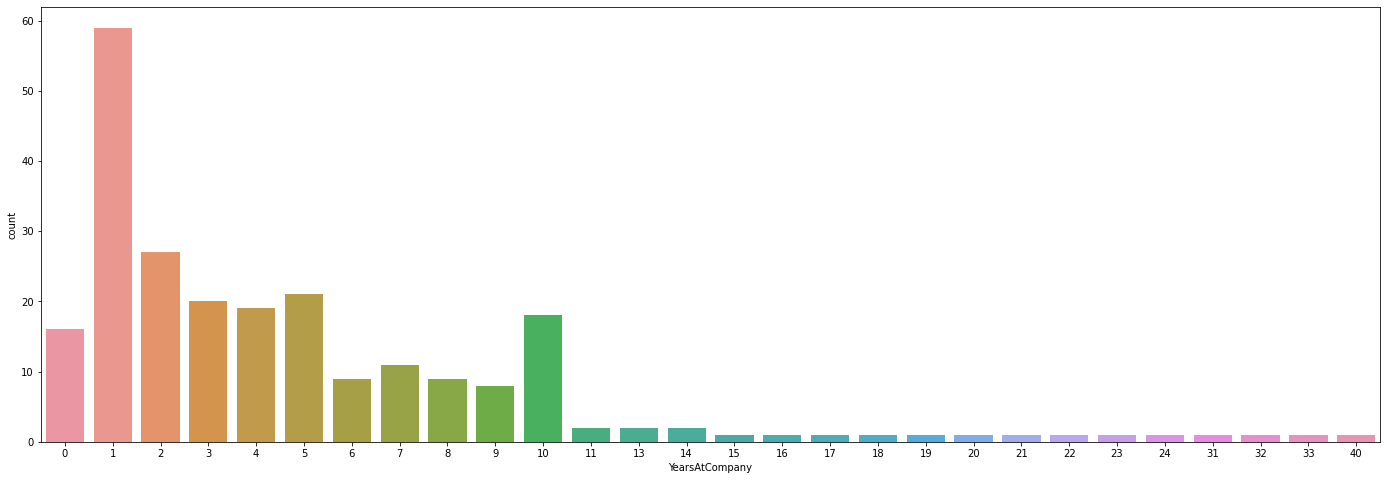

In [23]:
# years at company vs attrition

plt.figure(figsize=(24,8))
sns.countplot(x="YearsAtCompany", data=dt[dt["Attrition"]=='Yes'])
plt.show()

In [24]:
#lets check the correlation
corr= dt.corr()

In [25]:
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [26]:
#lets check the skewness
dt.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [29]:
#Lets remove the skewness
for index in dt.skew().index:
    if dt.skew().loc[index]>0.5:
        dt[index] = np.log1p(dt[index])
    if dt.skew().loc[index]<-0.5:
        dt[index] = np.square(dt[index])

In [30]:
#lets again check the skewness
dt.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [31]:
#Lets seperate the input and output
x=dt.drop(columns=['Attrition'],axis=1)
y=dt['Attrition']

In [32]:
#lets convert the categorical data to numerical for better data analysis
x=pd.get_dummies(dt,drop_first=True)
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,...,0,0,0,0,0,1,0,1,0,0


In [34]:
#now lets convert the target column -categorical to numerical
y=y.replace({'Yes':1,'No':0})

In [36]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [38]:
#now lets work on class imbalnce issue
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x,y = sm.fit_resample(x,y)

y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

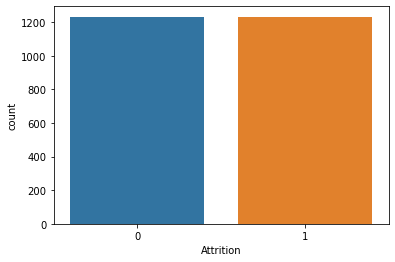

In [39]:
sns.countplot(y)

In [40]:
# Let's check the VIF Score

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scale = StandardScaler()
x_scale = scale.fit_transform(x)

vif = pd.DataFrame()
vif["VIF Score"] = [variance_inflation_factor(x_scale,i) for i in range(x_scale.shape[1])]
vif["Features"] = x.columns
vif

,VIF Score,Features
0,2.141599,Age
1,1.058354,DailyRate
2,1.056249,DistanceFromHome
3,1.113005,Education
4,1.149213,EnvironmentSatisfaction
5,1.037966,HourlyRate
6,1.181607,JobInvolvement
7,8.837552,JobLevel
8,1.137155,JobSatisfaction
9,8.506012,MonthlyIncome


Number of component explained 98% variance :  38


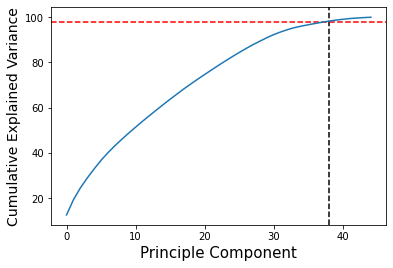

In [41]:
# Let's use PCA

from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

x_pca = PCA()
x_pca.fit(x_scale)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)

print("Number of component explained 98% variance : ",k)
plt.xlabel("Principle Component", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

In [44]:
# Let's use PCA for scaling

pca = PCA(n_components = 37)
X = pca.fit_transform(x)
X

array([[ 5.25569990e+03,  3.47346280e+02, -2.73948254e+01, ...,
         1.19402948e-01, -1.47846051e-01,  1.24463176e-01],
       [ 1.06873355e+04, -4.51375500e+02,  3.48022389e+00, ...,
        -7.76137575e-02,  3.89920724e-01, -8.16554622e-02],
       [-1.18283437e+04,  5.41723893e+02, -2.49521374e+01, ...,
        -5.28506874e-02,  2.01572445e-01,  5.64508122e-01],
       ...,
       [-1.12059511e+04,  9.42708250e+00,  6.15318882e+00, ...,
        -1.04950712e-01,  1.08928532e-01, -8.96532975e-02],
       [ 4.11074253e+03, -3.33874659e+02, -4.17271377e-01, ...,
         5.67761493e-01,  2.77254895e-02, -4.03803839e-01],
       [ 9.21404070e+03, -1.66004174e+02,  1.41694229e+01, ...,
         1.01860086e-01,  6.13194584e-02,  1.60869141e-01]])

In [45]:
# Let's import the necessary libraries for model building

from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [49]:
# Let's find the best random state for eact best model


def bestmodel(model):
    start = time()
    max_auc = 0
    max_state =0
    for i in range(21,101):
        x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_auc:
            max_auc = score
            max_state = i
    print("Best Accuracy Score corresponding ",max_state," is",max_auc)
    print("Cross Validation Score is : ",cross_val_score(model,X,y,cv=5).mean())
    end = time()
    print("Time Taken by Model for prediction : {:.4f} seconds".format(end-start))

In [51]:
# Logistic Regression
LR = LogisticRegression()
bestmodel(LR)

Best Accuracy Score corresponding  71  is 0.9453441295546559
Cross Validation Score is :  0.8893439324633944
Time Taken by Model for prediction : 6.5286 seconds


In [53]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Accuracy Score corresponding  76  is 0.9412955465587044
Cross Validation Score is :  0.9095893110839199
Time Taken by Model for prediction : 8.8659 seconds


In [54]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Accuracy Score corresponding  57  is 0.7651821862348178
Cross Validation Score is :  0.7161360258189553
Time Taken by Model for prediction : 5.8645 seconds


In [55]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
bestmodel(RFC)

Best Accuracy Score corresponding  22  is 1.0
Cross Validation Score is :  0.9728728514999467
Time Taken by Model for prediction : 84.9971 seconds


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 36)

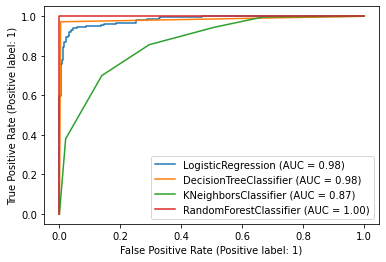

In [59]:
# Let's plot ROC AUC curve

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()

By checking the accuracy scores & ROC AUC curver, It is clear that Random Forest Classifier is giving the best score. So, let's try to increase the accuracy score using Hyperparameter Tuning with Random Forest Classifier.

In [60]:
# Hyperparameter Tuning with Random Forest Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200], "criterion" : ["gini", "entropy"],
             "min_samples_split" : [2,3], "min_samples_leaf" : [1,2]}

grid_search = GridSearchCV(RFC,param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [62]:
# Final Model

Final_HR_Model = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=3, n_estimators=200)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 36)
Final_HR_Model.fit(x_train, y_train)
y_preds = Final_HR_Model.predict(x_test)
accuracy_score(y_test,y_preds)

0.9979757085020243

In [63]:
# Saving the Final Model

import joblib

joblib.dump(Final_HR_Model,"Final_HR_Model.pkl")

['Final_HR_Model.pkl']